In [78]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
import graphviz
from sklearn.tree import export_graphviz

pd.set_option('display.max_columns', None)

In [79]:
# download the data
cancer_data = load_breast_cancer()
type(cancer_data)

sklearn.utils._bunch.Bunch

In [80]:
# load data into pandas dataframe
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df['target'] = cancer_data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [81]:
# divvy up training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['target']), df['target'], random_state=42)


In [82]:
# create the decision tree object
dt = tree.DecisionTreeClassifier(random_state = 42)

In [83]:
# train the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [84]:
# test the model
y_pred = dt.predict(X_test)

In [85]:
# print classificaiton report
target_names = ['benign', 'malignant']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      benign       0.93      0.94      0.94        54
   malignant       0.97      0.96      0.96        89

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [86]:
# get the first row of data from the data frame
df.drop(columns = 'target', inplace=True)
subject = df.iloc[0]
subject

mean radius                  17.990000
mean texture                 10.380000
mean perimeter              122.800000
mean area                  1001.000000
mean smoothness               0.118400
mean compactness              0.277600
mean concavity                0.300100
mean concave points           0.147100
mean symmetry                 0.241900
mean fractal dimension        0.078710
radius error                  1.095000
texture error                 0.905300
perimeter error               8.589000
area error                  153.400000
smoothness error              0.006399
compactness error             0.049040
concavity error               0.053730
concave points error          0.015870
symmetry error                0.030030
fractal dimension error       0.006193
worst radius                 25.380000
worst texture                17.330000
worst perimeter             184.600000
worst area                 2019.000000
worst smoothness              0.162200
worst compactness        

In [91]:
# run the prediction model on the first row of data
new_prediction = dt.predict(df.iloc[0].values.reshape(1, -1))
print("prediction: ", new_prediction[0],'\n')

prediction:  0 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


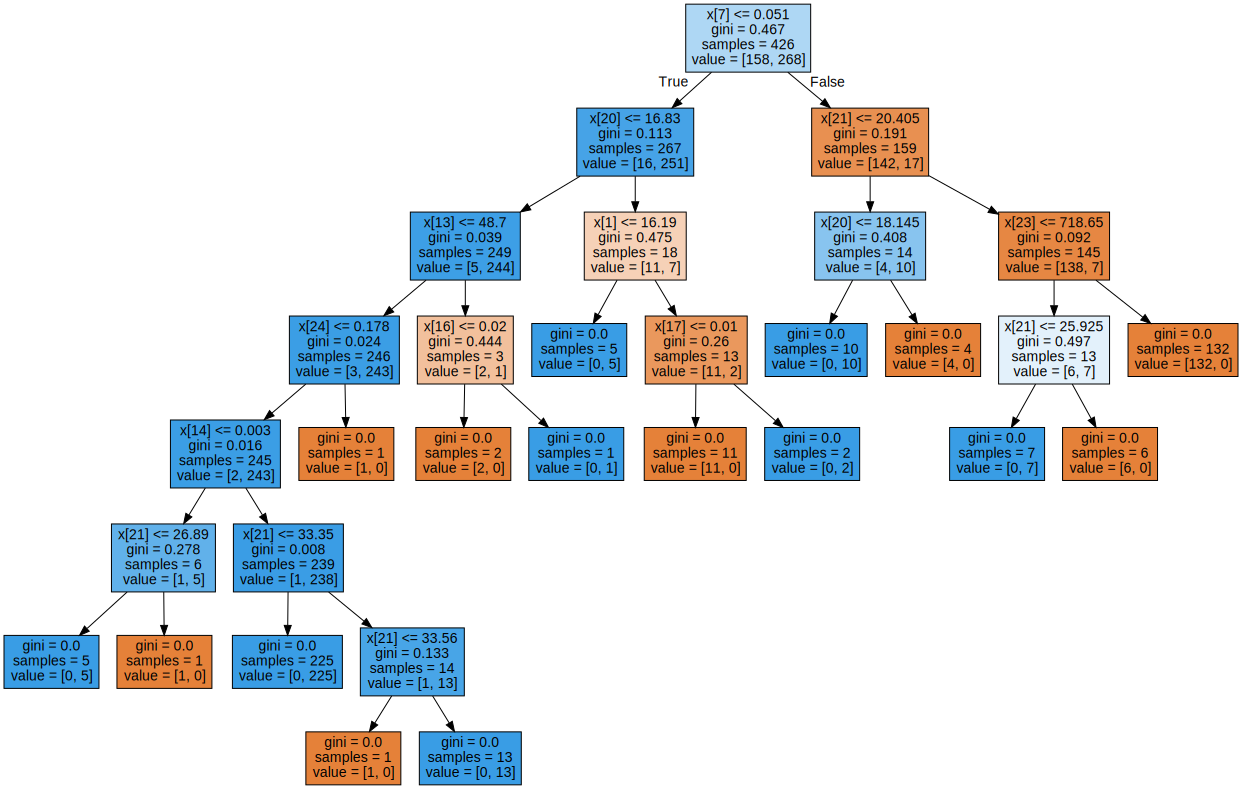

In [88]:
# view our decision tree
dot_data = export_graphviz(dt, out_file=None, filled=True)
graph = graphviz.Source(dot_data)
graph